In [2]:
# load packages
import pandas as pd
import statsmodels.tsa.stattools as stats
import statsmodels.graphics.tsaplots as sg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

In [3]:
def get_experiment_list(filename):
    # load files
    timecourse = pd.read_csv(filename, sep="\t")
    # divide into list of dataframes
    experiments = []
    for i in range(0,85,21):
        experiments.append(timecourse.ix[i:i+20])
    
    #reformat
    for idx,exp in enumerate(experiments):
        exp = exp.set_index('Time')
        experiments[idx]=exp
    return(experiments)
    

##Plotting single time-courses for exp 1

Gold standard for network 1: <p>
```G1	G2	1
G1	G3	1
G1	G4	1
G1	G5	1
G3	G4	1
G3	G7	1
G4	G3	1
G6	G2	1
G7	G3	1
G7	G4	1
G8	G2	1
G8	G6	1
G9	G10	1
G10	G3	1
G10	G4	1```

In [57]:
#list of nodes = G1..G10
nodes = ['G'+str(x) for x in range(1,11)]
#convert edge list to list of tuples
edges = pd.read_csv("../data/dream4/insilico_size10_1_goldstandard.tsv",sep="\t",header=None)
edges = edges[edges[2] > 0]
edges=edges[edges.columns[0:2]]
edges = [tuple(x) for x in edges.values]

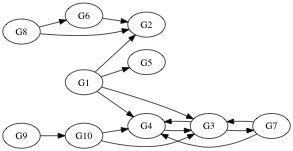

In [55]:
G = nx.DiGraph()
G.graph['rankdir'] = 'LR'
G.graph['dpi'] = 50


G.add_nodes_from(nodes)
G.add_edges_from(edges)
#examples of other kinds of drawing
#G.add_node(0, color='red', style='filled', fillcolor='pink')
#G.add_node(1, shape='square')
#G.add_node(3, style='filled', fillcolor='#00ffff')
#G.add_edge(0, 1, color='red', style='dashed')
#G.add_edge(3, 3, label='a')
draw(G)

In [56]:
experiments=get_experiment_list("../data/dream4/insilico_size10_1_timeseries.tsv")

In [58]:
# formatting matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

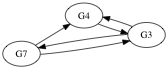

In [61]:
Ga = nx.DiGraph()
Ga.graph['rankdir'] = 'LR'
Ga.graph['dpi'] = 50
nodes = ['G7','G4','G3']
edges = [('G7','G4'),('G3','G4'),('G7','G3'),('G4','G3'),('G3','G7')]
Ga.add_nodes_from(nodes)
Ga.add_edges_from(edges)
draw(Ga)

/Users/jjw036/anaconda/lib/python3.4/site-packages/pandas/tools/plotting.py:929: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


/Users/jjw036/anaconda/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


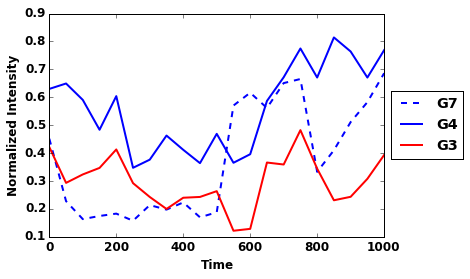

In [59]:
# plot time series for an interaction
ax = experiments[0][['G7', 'G4','G3']].plot(linewidth=2, colors=['blue','blue','red'], style=['--','-','-'])
ax.set_ylabel('Normalized Intensity', fontweight='bold')
ax.set_xlabel('Time',fontweight='bold')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

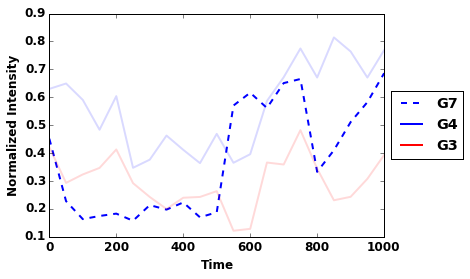

In [193]:
# plot time series for an interaction

ax = experiments[0][['G7', 'G4','G3']].plot(linewidth=2, color=['blue','blue','red'], style=['--','-','-'])
ax.set_ylabel('Normalized Intensity', fontweight='bold')
ax.set_xlabel('Time',fontweight='bold')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for ix,l in enumerate(ax.lines):
    if ix != 0:
        l.set_alpha(.15)

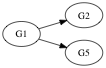

In [62]:
Ga = nx.DiGraph()
Ga.graph['rankdir'] = 'LR'
Ga.graph['dpi'] = 50
nodes = ['G1','G5','G2']
edges = [('G1','G5'),('G1','G2')]
Ga.add_nodes_from(nodes)
Ga.add_edges_from(edges)
draw(Ga)

/Users/jjw036/anaconda/lib/python3.4/site-packages/pandas/tools/plotting.py:929: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


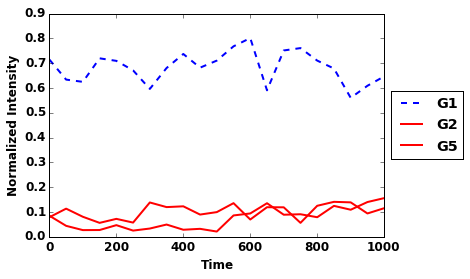

In [145]:
# plot time series for an interaction
ax = experiments[0][['G1', 'G2','G5']].plot(linewidth=2, colors=['blue','red','red'], style=['--','-','-'])
ax.set_ylabel('Normalized Intensity', fontweight='bold')
ax.set_xlabel('Time',fontweight='bold')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [65]:
Gb = nx.DiGraph()
Gb.graph['rankdir'] = 'LR'
Gb.graph['dpi'] = 50
nodes = ['G9','G10','G4']
edges = [('G9','G10'),('G10','G4')]
Gb.add_nodes_from(nodes)
Gb.add_edges_from(edges)
draw(Gb)

/Users/jjw036/anaconda/lib/python3.4/site-packages/pandas/tools/plotting.py:929: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


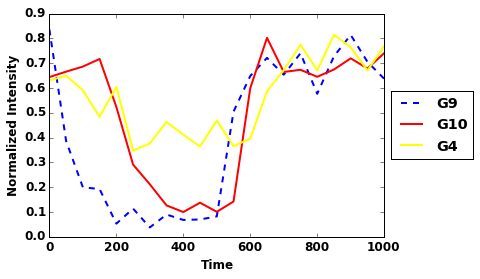

In [64]:
# plot time series for an interaction
ax = experiments[0][['G9', 'G10','G4']].plot(linewidth=2, colors=['blue','red','yellow'], style=['--','-','-'])
ax.set_ylabel('Normalized Intensity', fontweight='bold')
ax.set_xlabel('Time',fontweight='bold')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

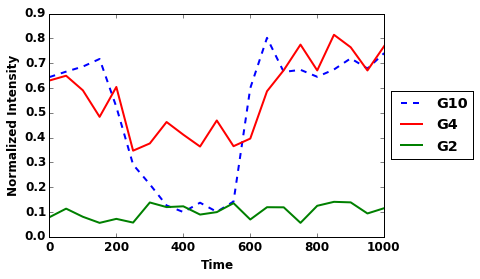

In [128]:
ax = experiments[0][['G10','G4','G2']].plot(linewidth=2, color=['blue','red','green'], style=['--','-','-'])
ax.set_ylabel('Normalized Intensity', fontweight='bold')
ax.set_xlabel('Time',fontweight='bold')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

##Investigating autocorrelation

/Users/jjw036/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


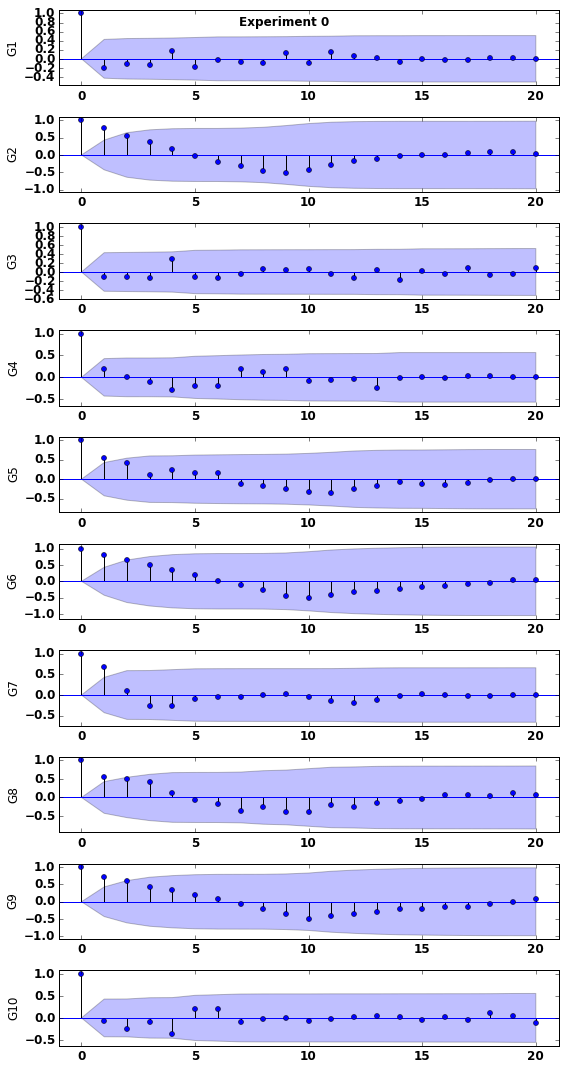

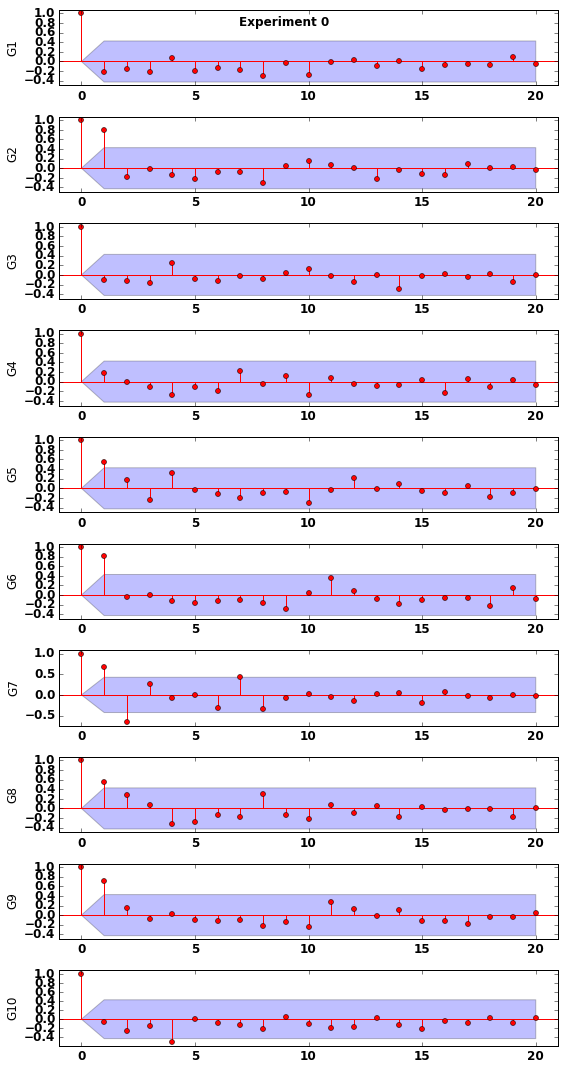

In [131]:

nodes = ['G'+str(x) for x in range(1,11)]

def plot_acf_exp(exp,experiments,acf_or_pacf='acf'):
    fig = plt.figure(figsize=(8,15))
    for idx,node in enumerate(nodes):
        ax1 = fig.add_subplot(10,1,idx+1)
        if acf_or_pacf == 'pacf':
            fig = sg.plot_pacf(experiments[exp][node], lags=20, ax=ax1,color='red')
        if acf_or_pacf == 'acf':
            fig = sg.plot_acf(experiments[exp][node], lags=20, ax=ax1)
        ax1.set_title("")
        ax1.set_ylabel(node)
    fig.suptitle("Experiment " +str(exp))
    fig.tight_layout()
    return(fig)


fig=plot_acf_exp(0,experiments,'acf')
fig2=plot_acf_exp(0,experiments,'pacf')
#ax2 = fig.add_subplot(512)
#fig = sg.plot_pacf(experiments[0]['G4'], lags=20, ax=ax2)

/Users/jjw036/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


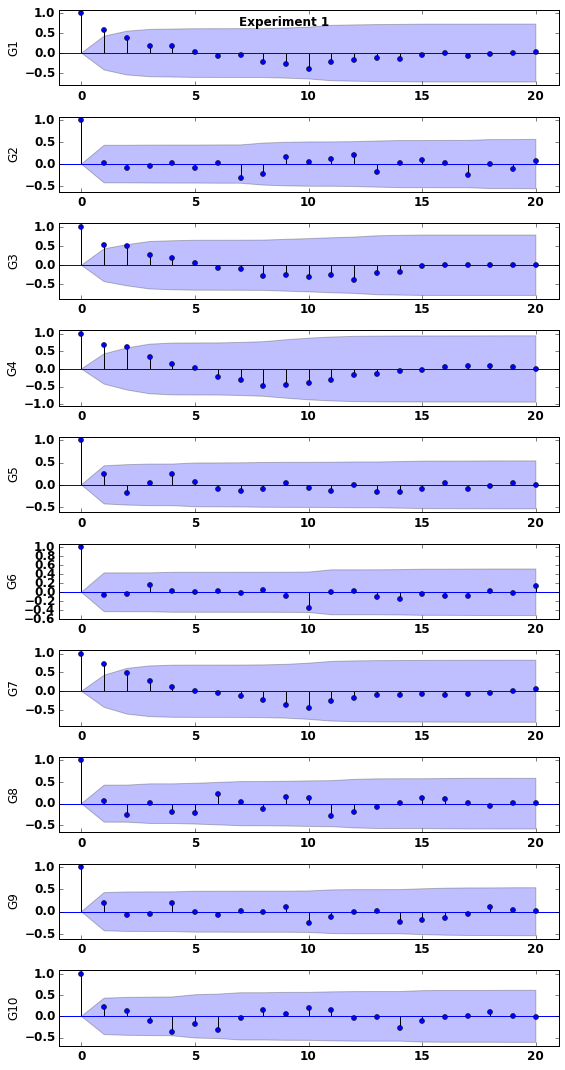

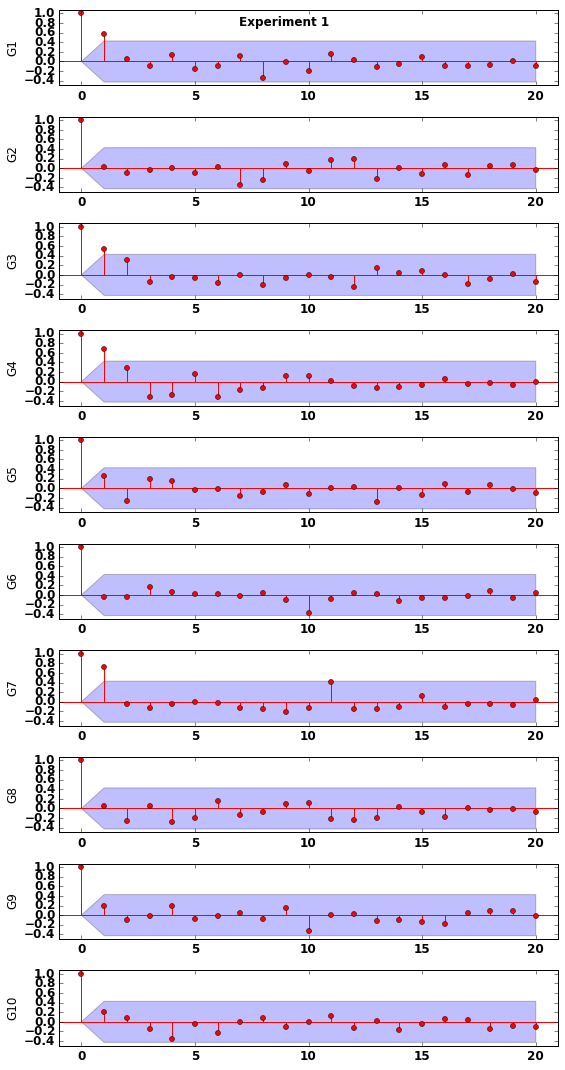

In [125]:
fig=plot_acf_exp(1,experiments,'acf')
fig2=plot_acf_exp(1,experiments,'pacf')

/Users/jjw036/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


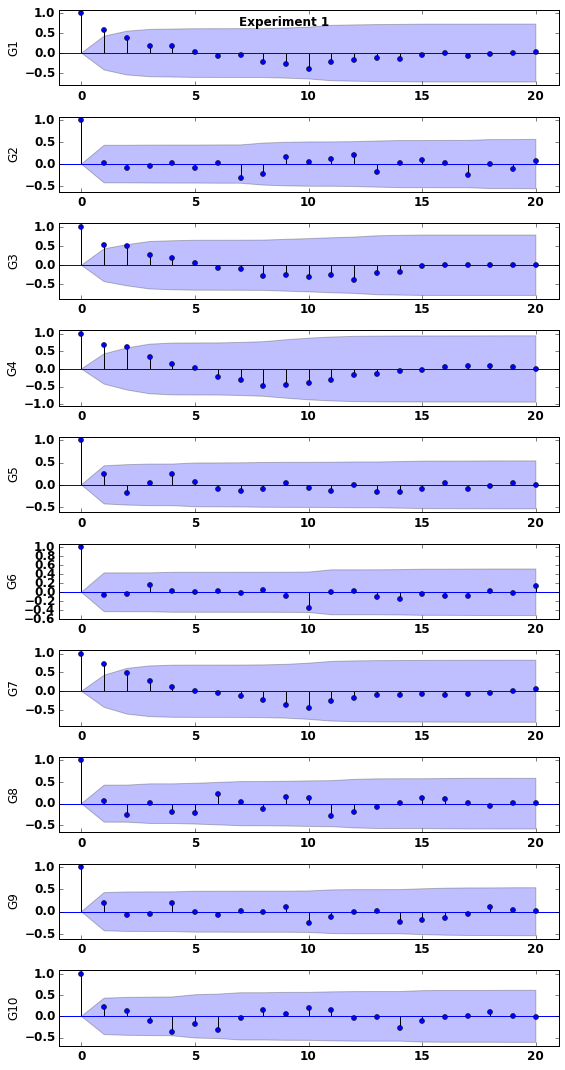

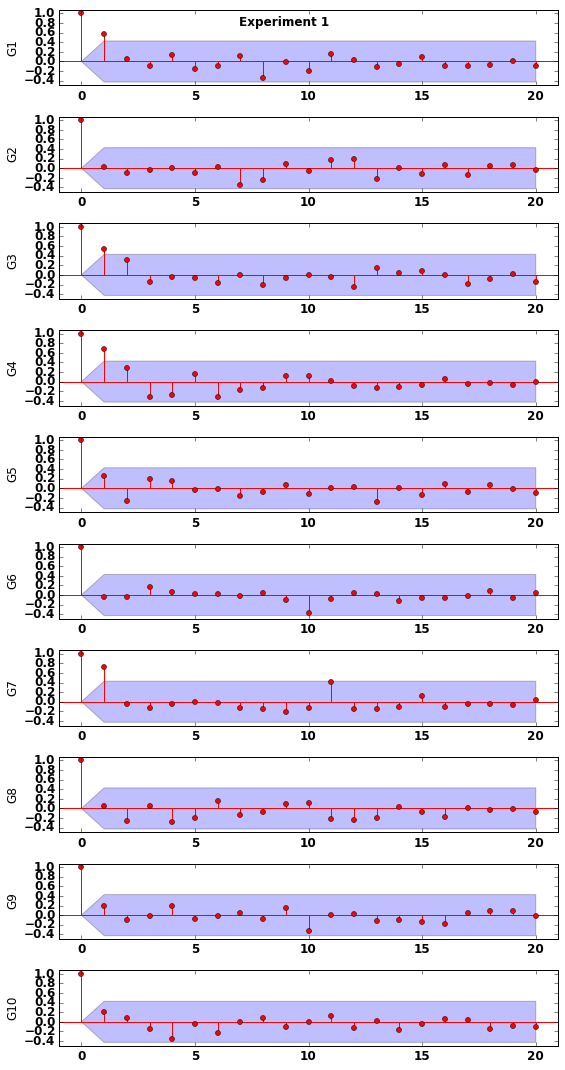

In [123]:
fig=plot_acf_exp(2,experiments,'acf')
fig2=plot_acf_exp(2,experiments,'pacf')

/Users/jjw036/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


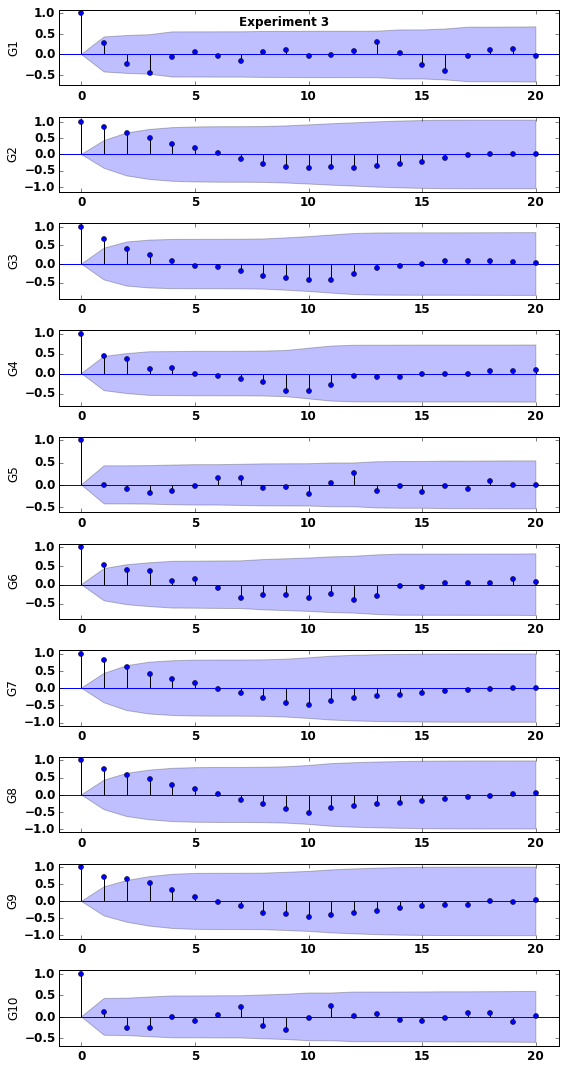

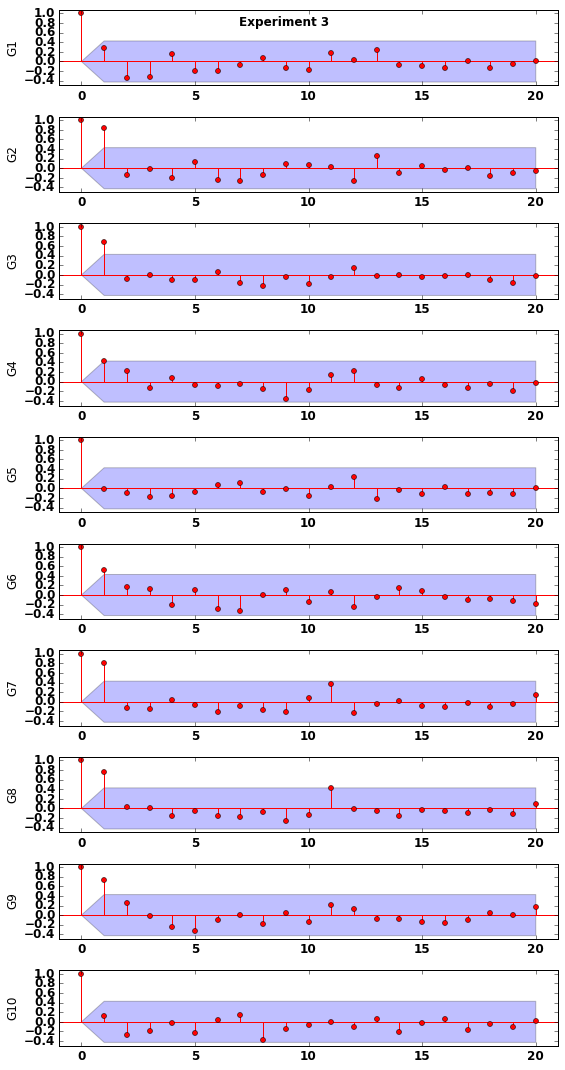

In [126]:
fig=plot_acf_exp(3,experiments,'acf')
fig2=plot_acf_exp(3,experiments,'pacf')

/Users/jjw036/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


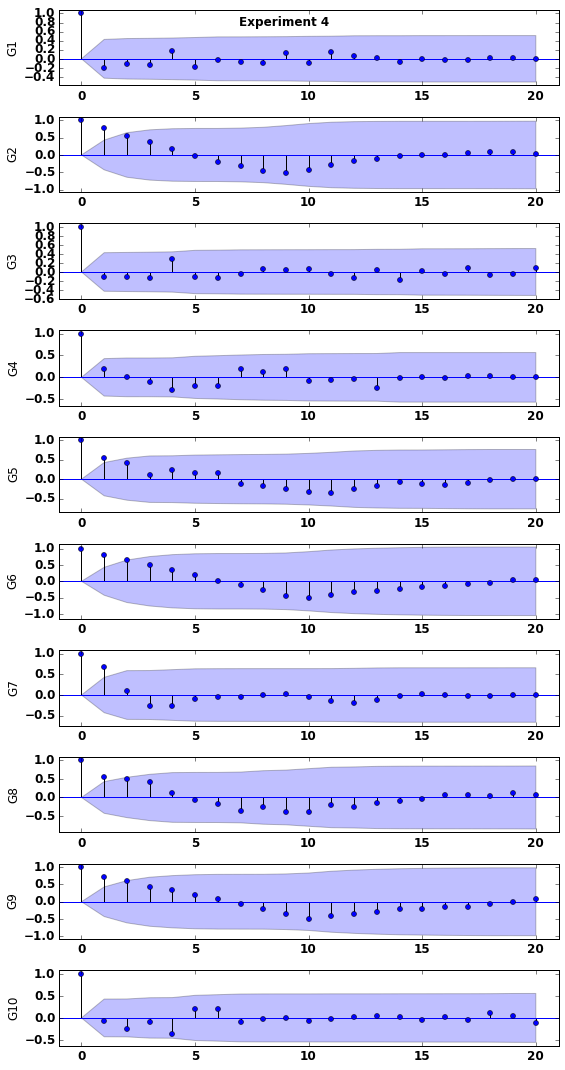

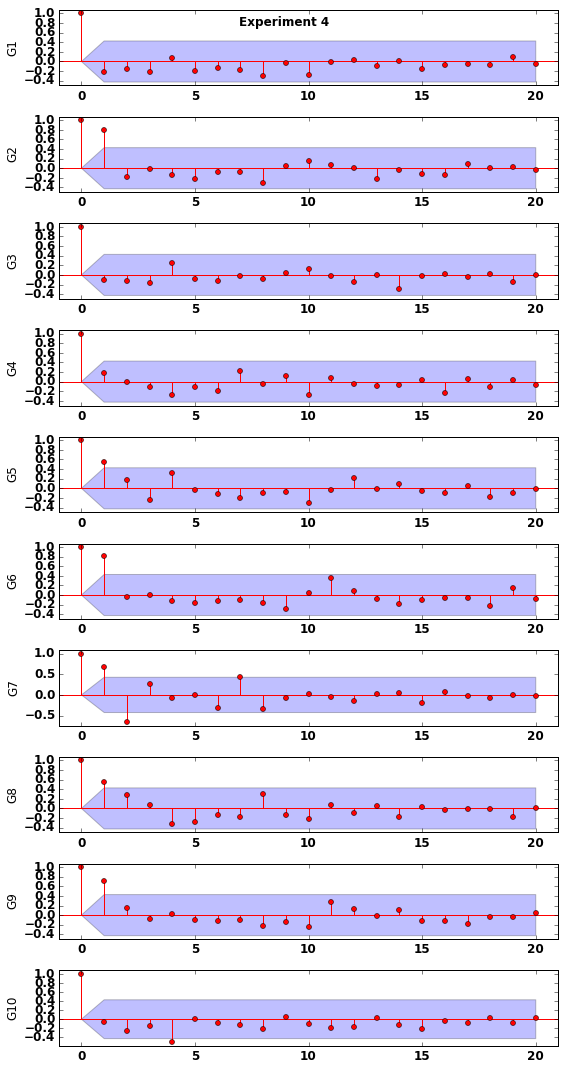

In [133]:
fig=plot_acf_exp(4,experiments,'acf')
fig2=plot_acf_exp(4,experiments,'pacf')

## Network 2-5

/Users/jjw036/anaconda/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/jjw036/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


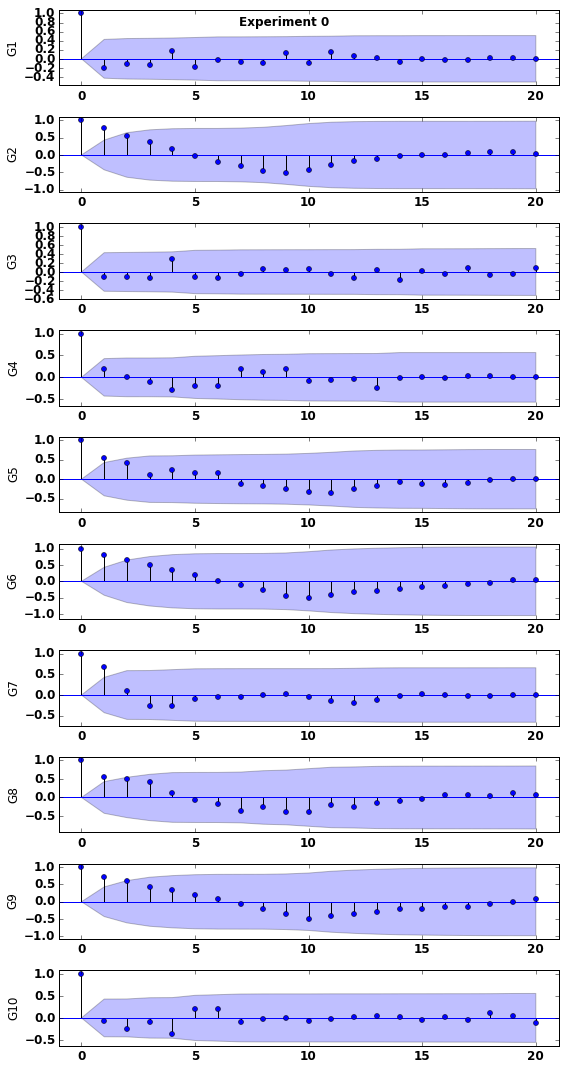

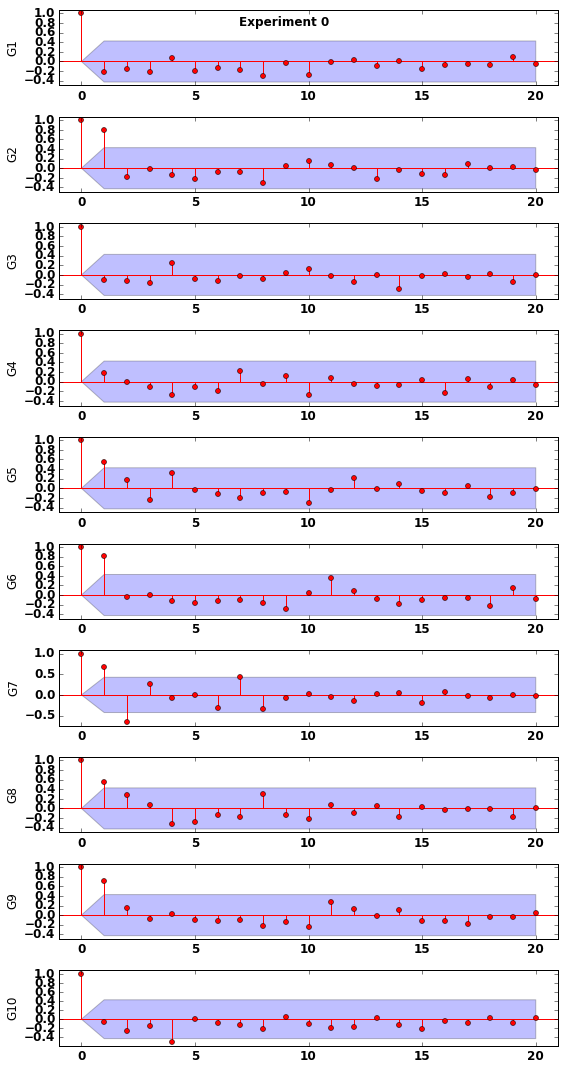

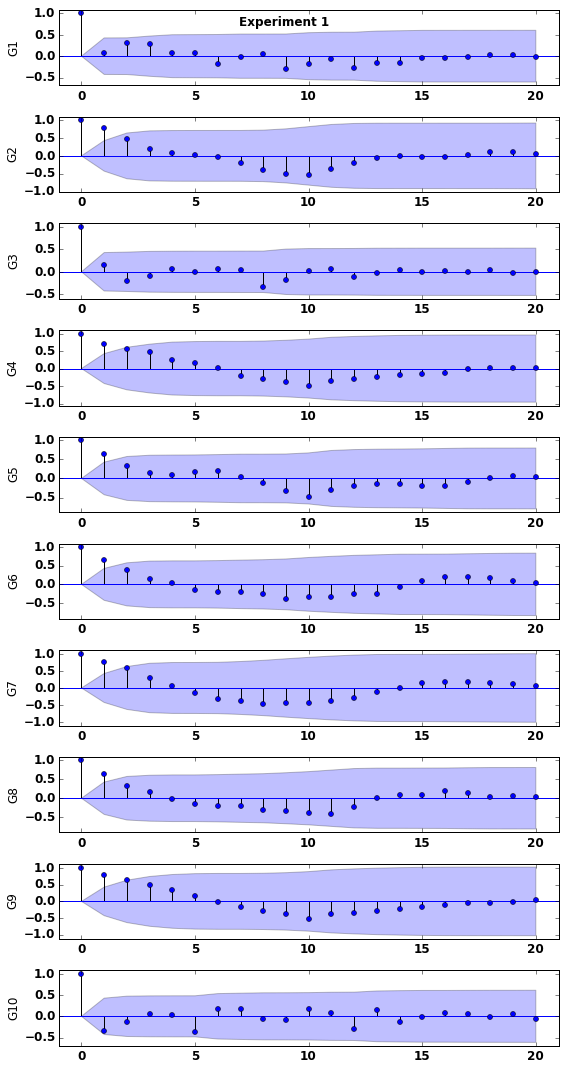

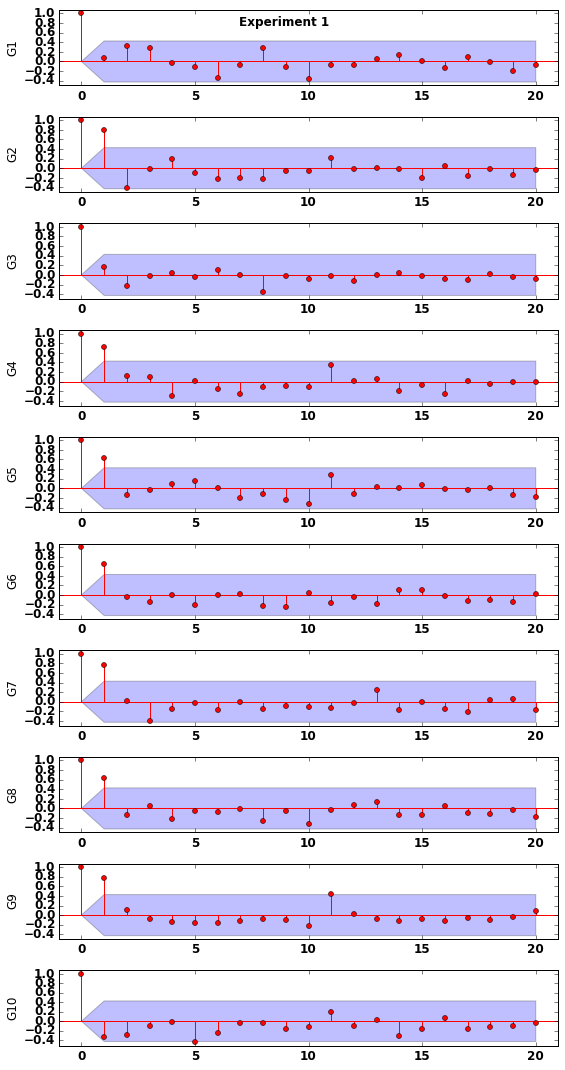

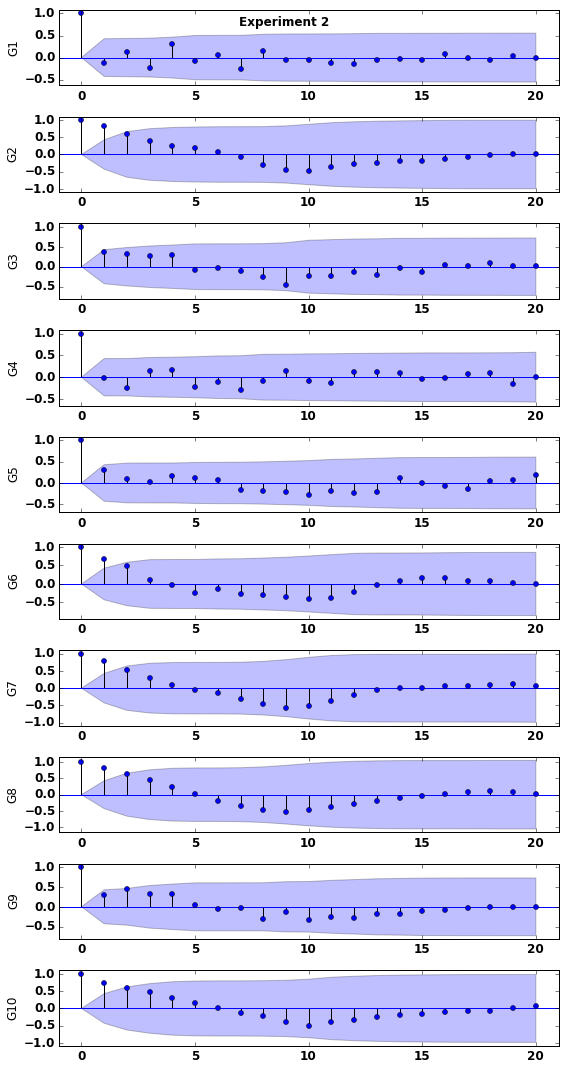

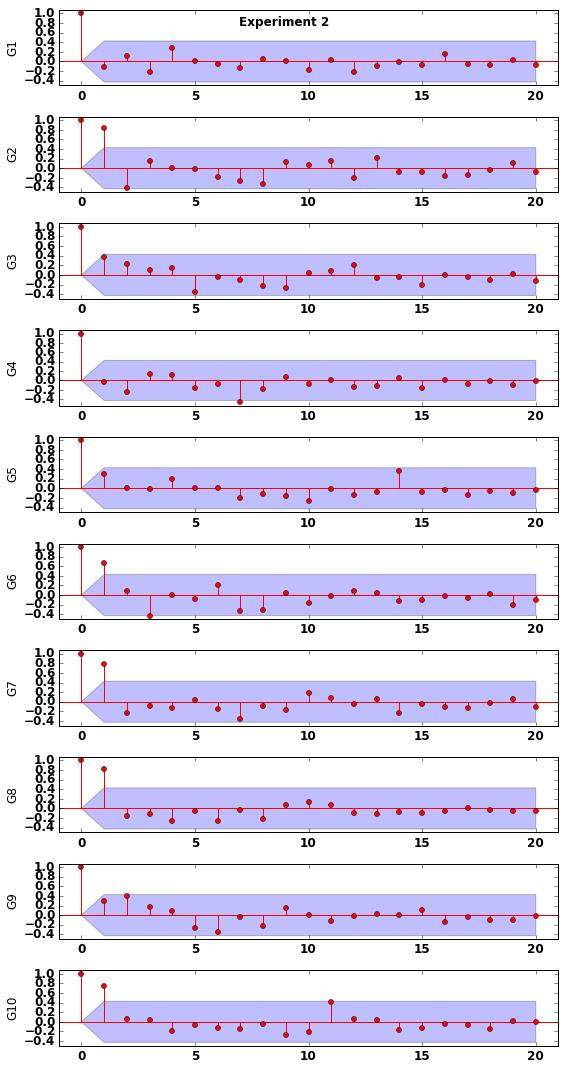

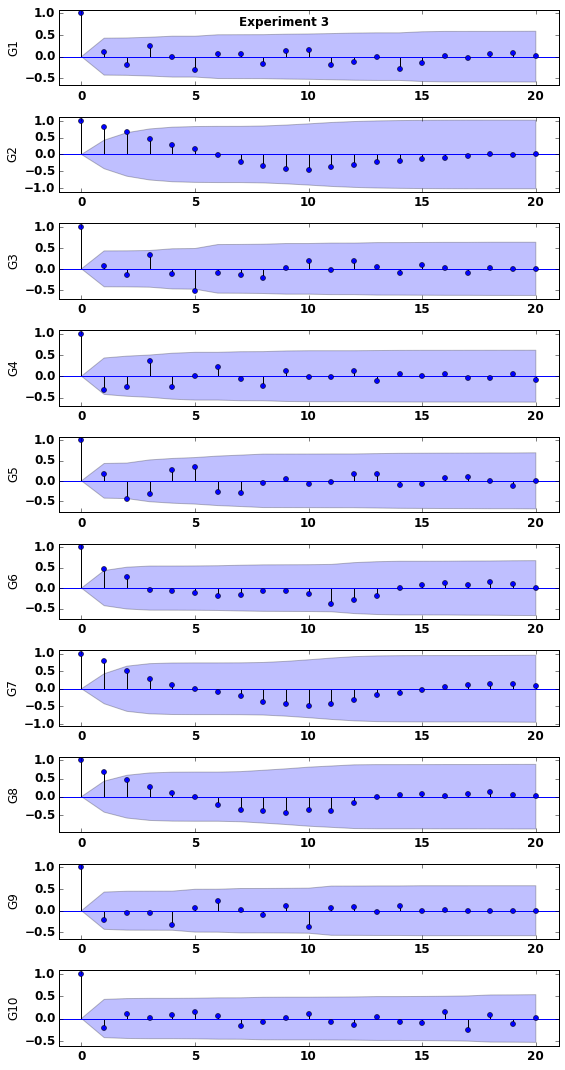

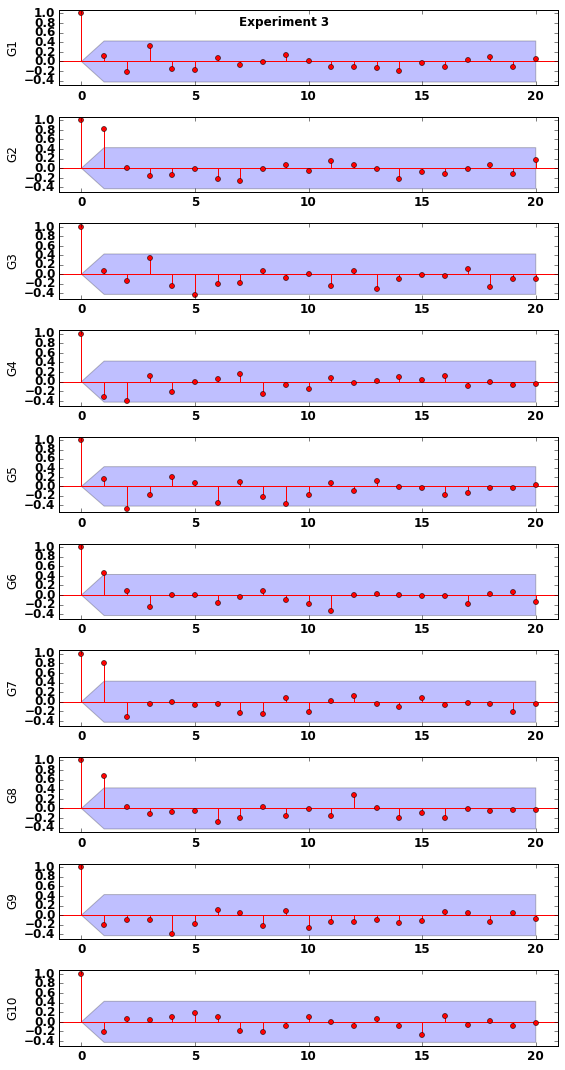

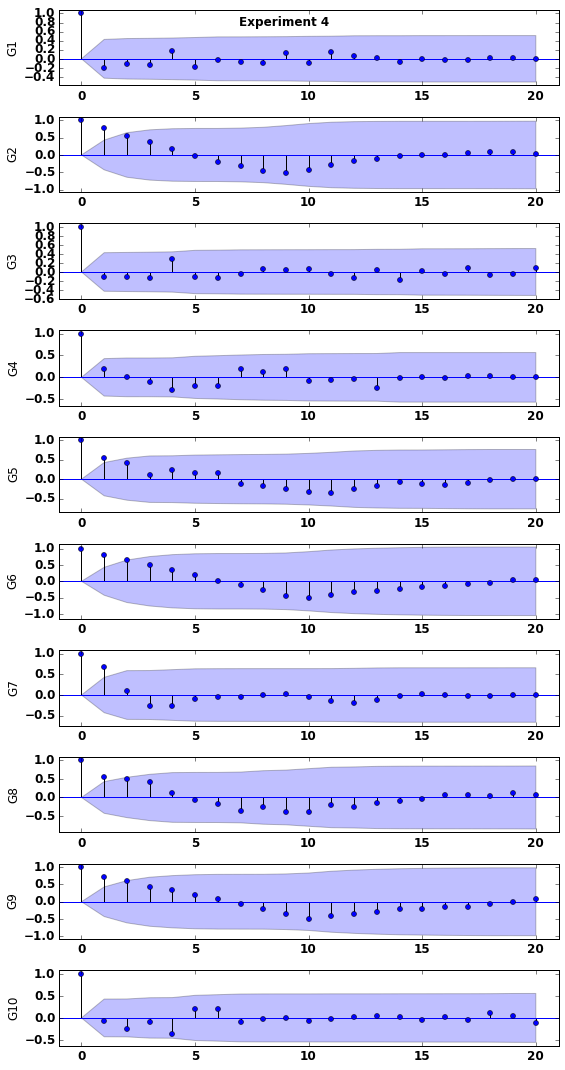

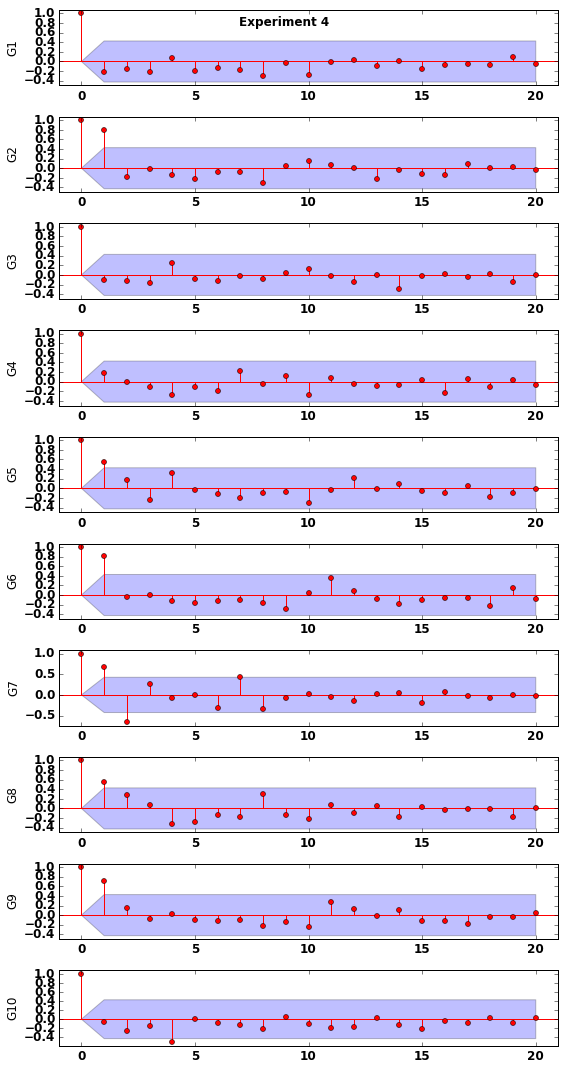

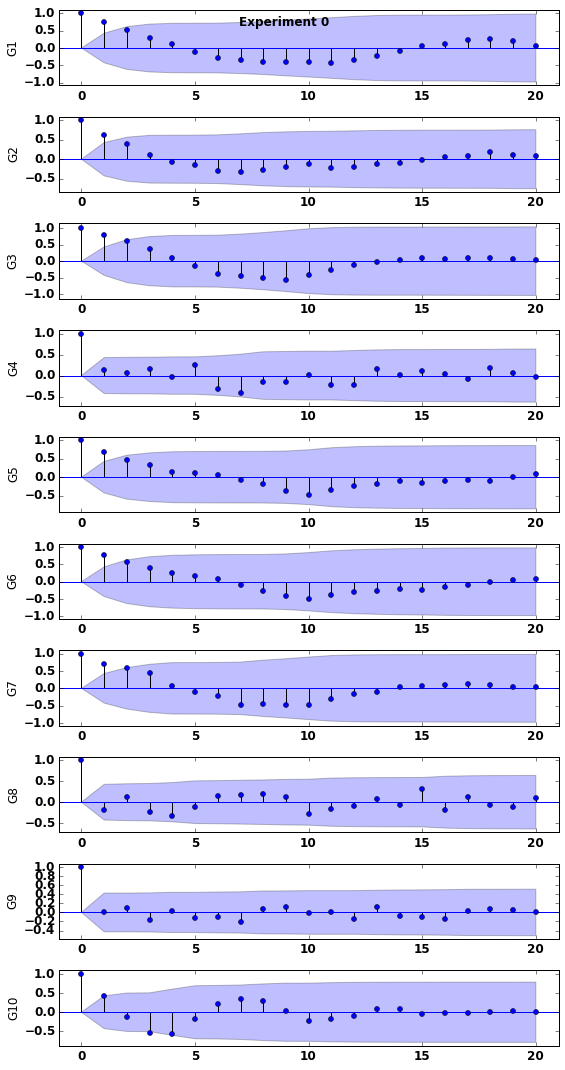

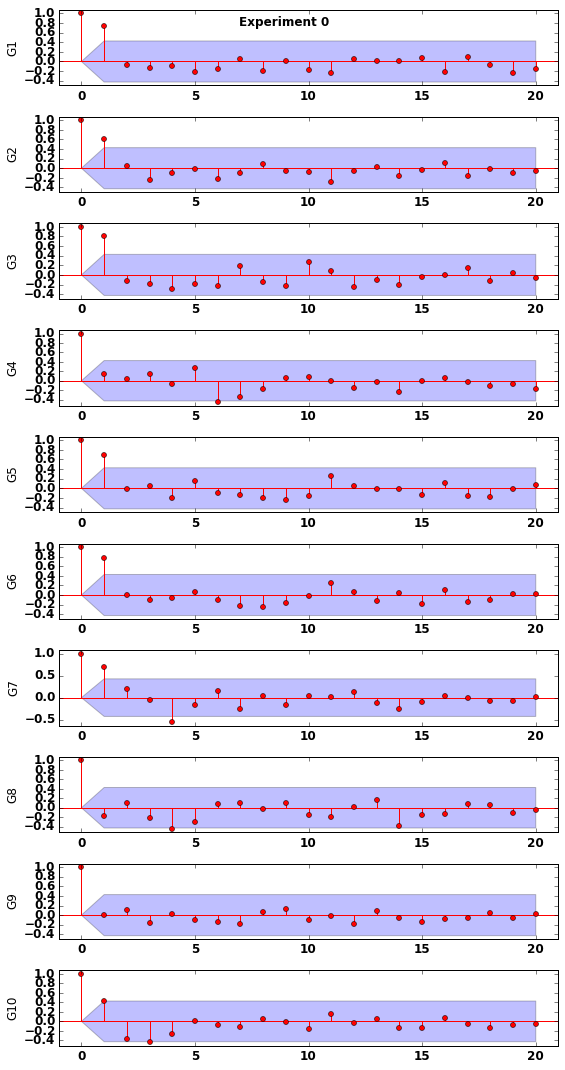

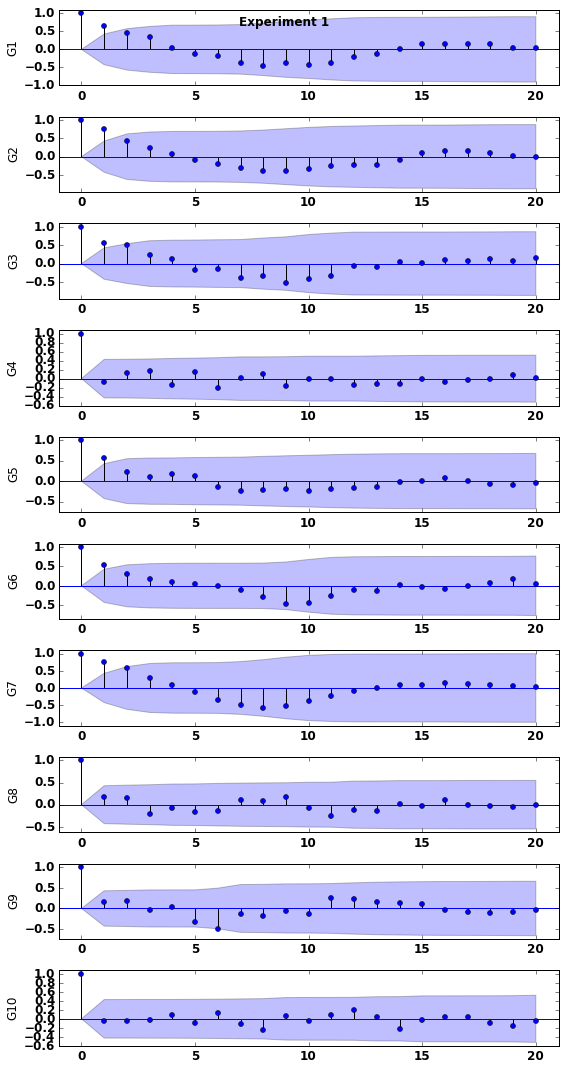

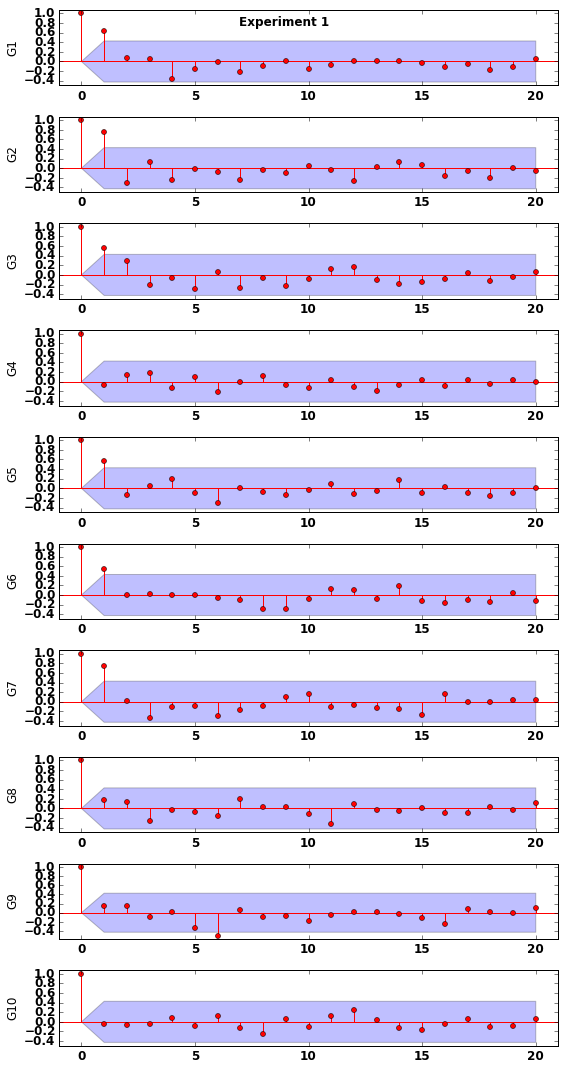

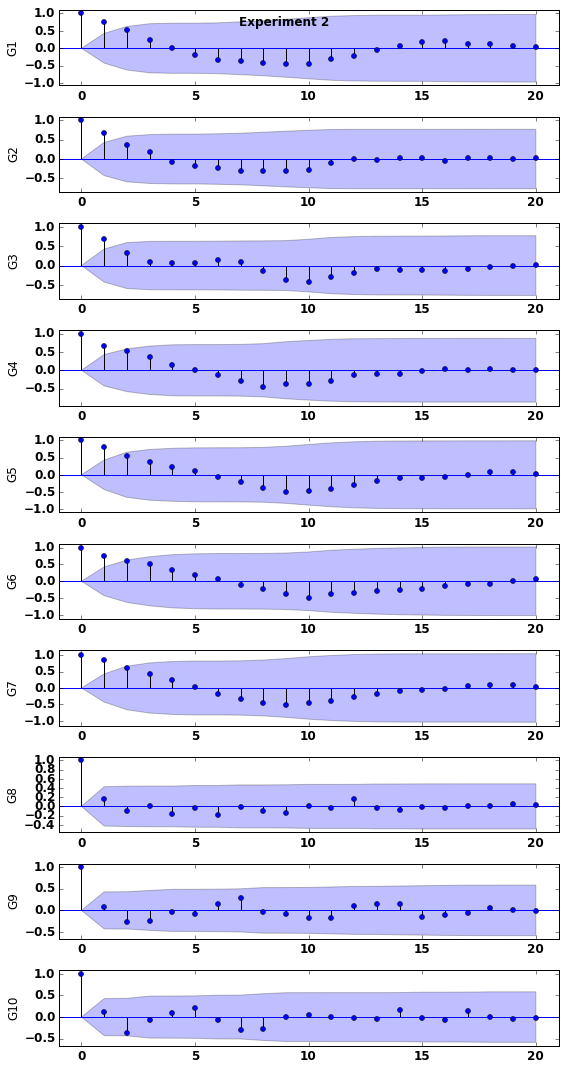

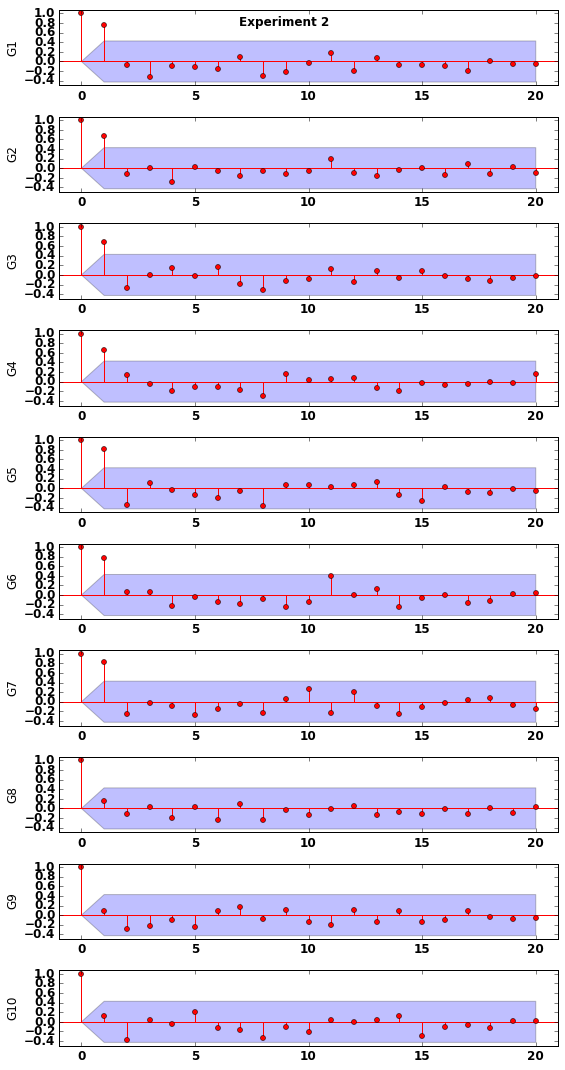

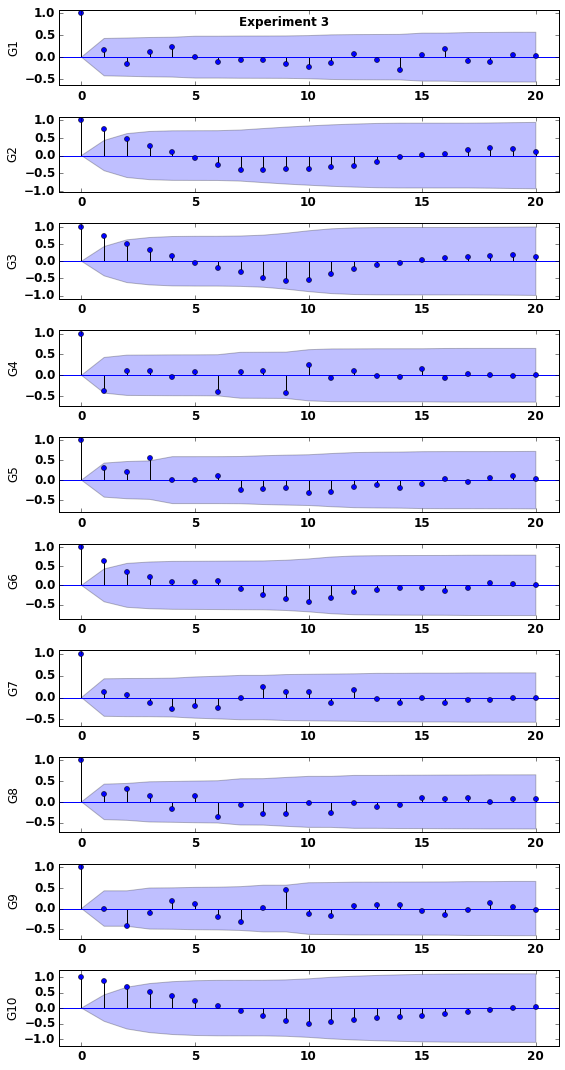

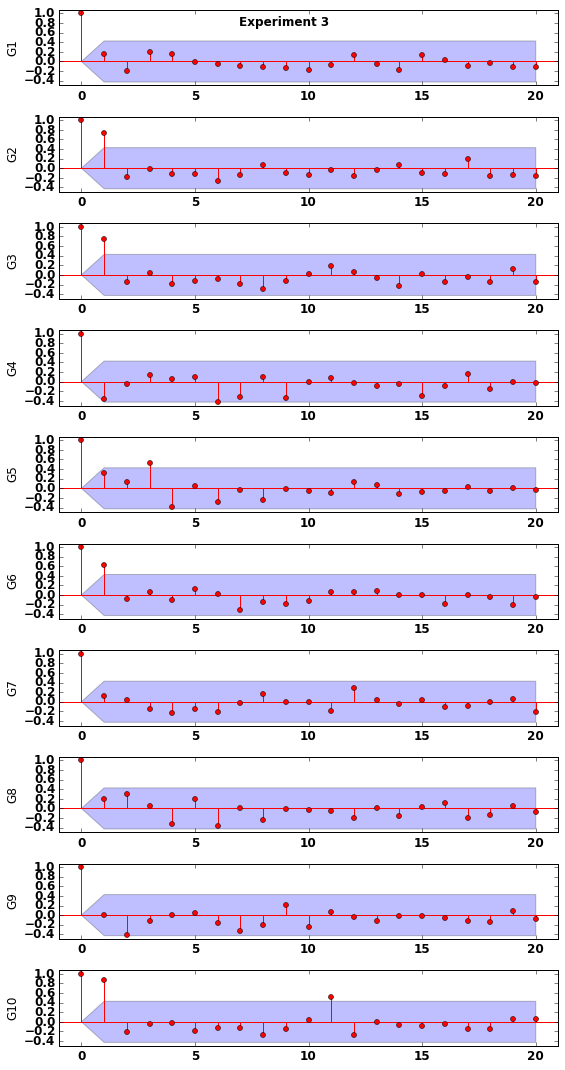

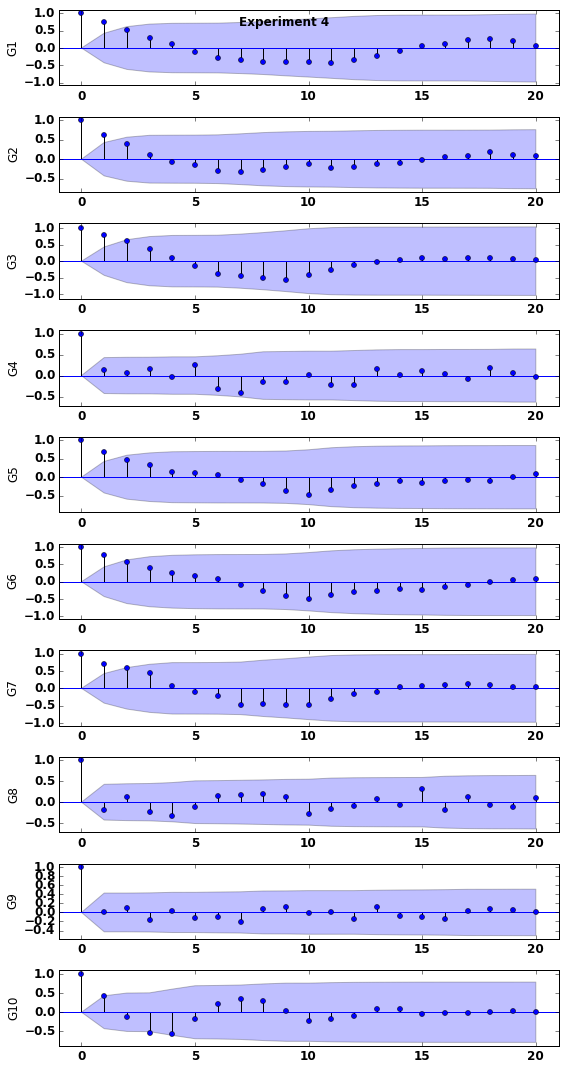

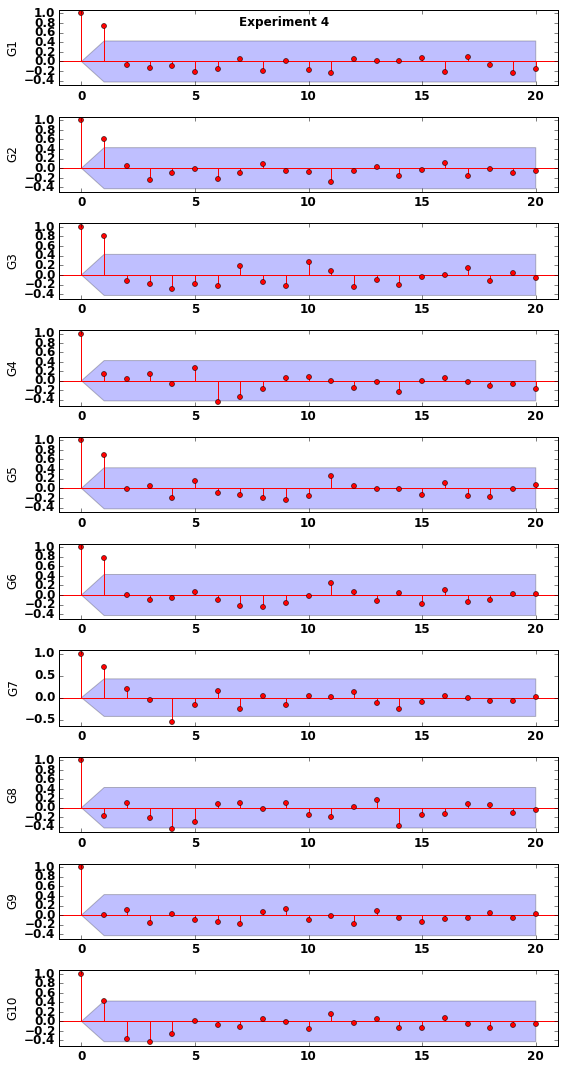

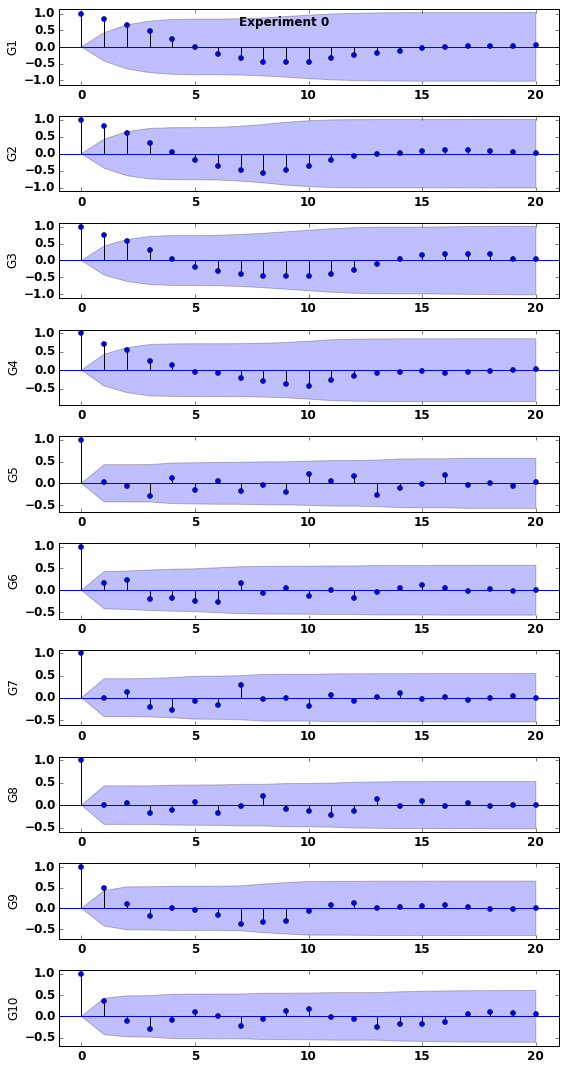

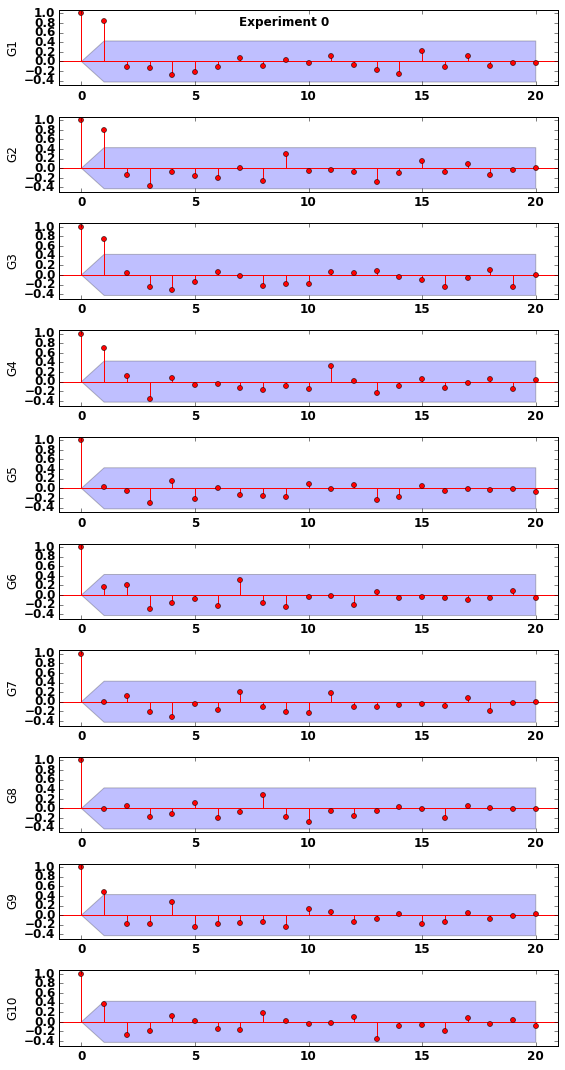

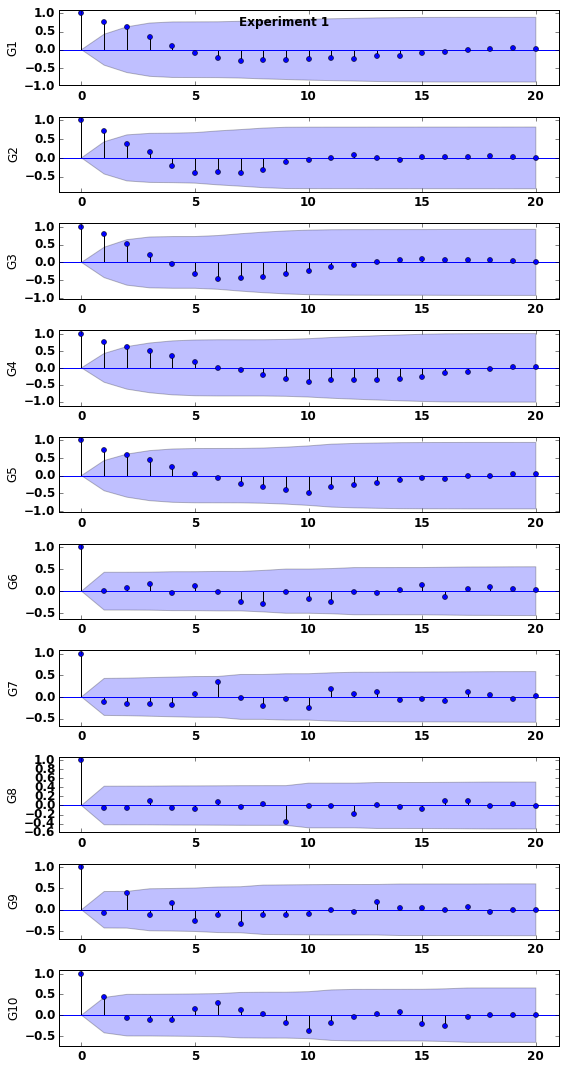

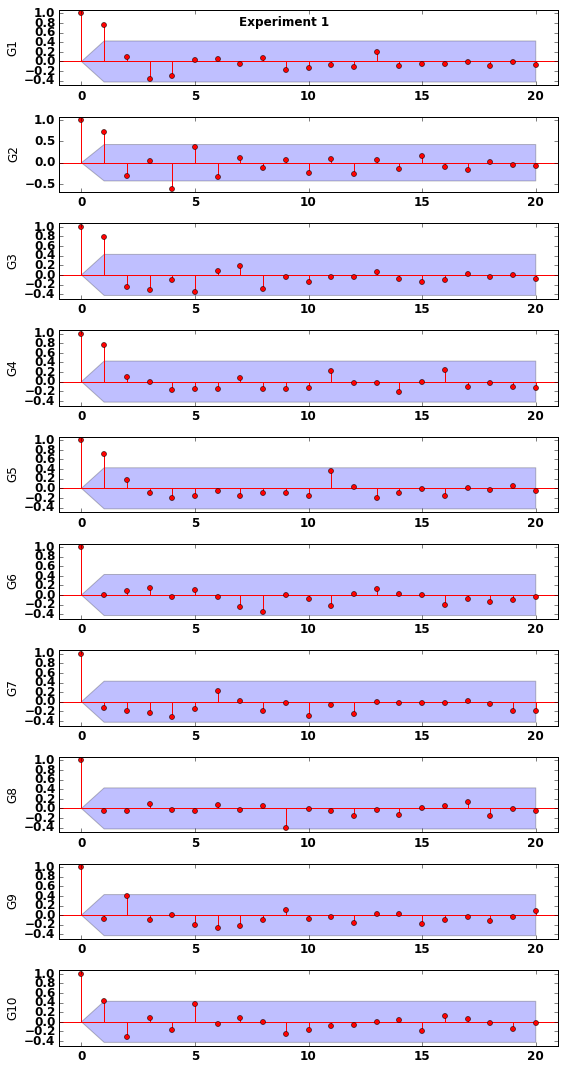

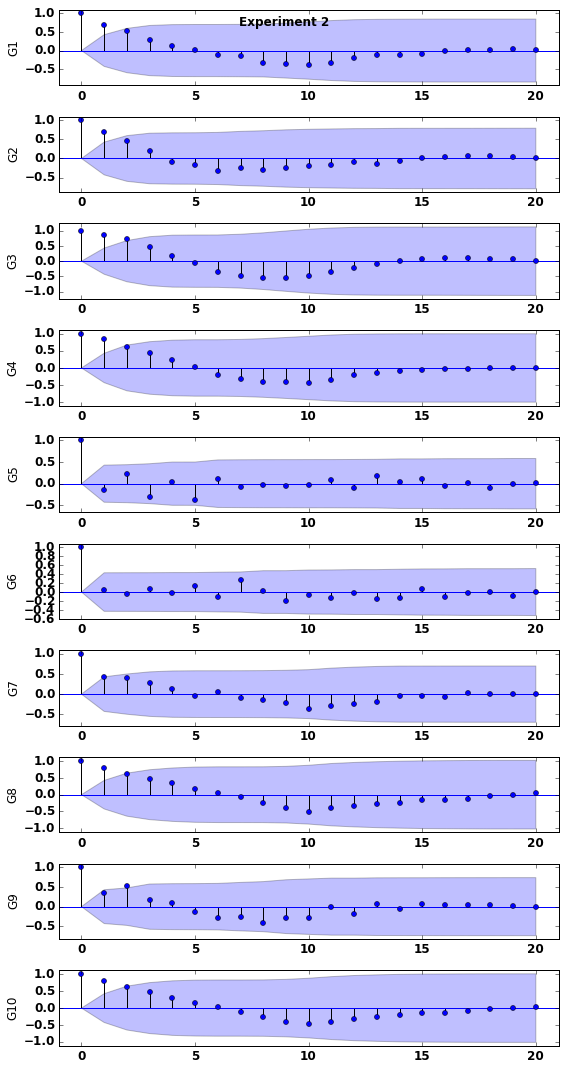

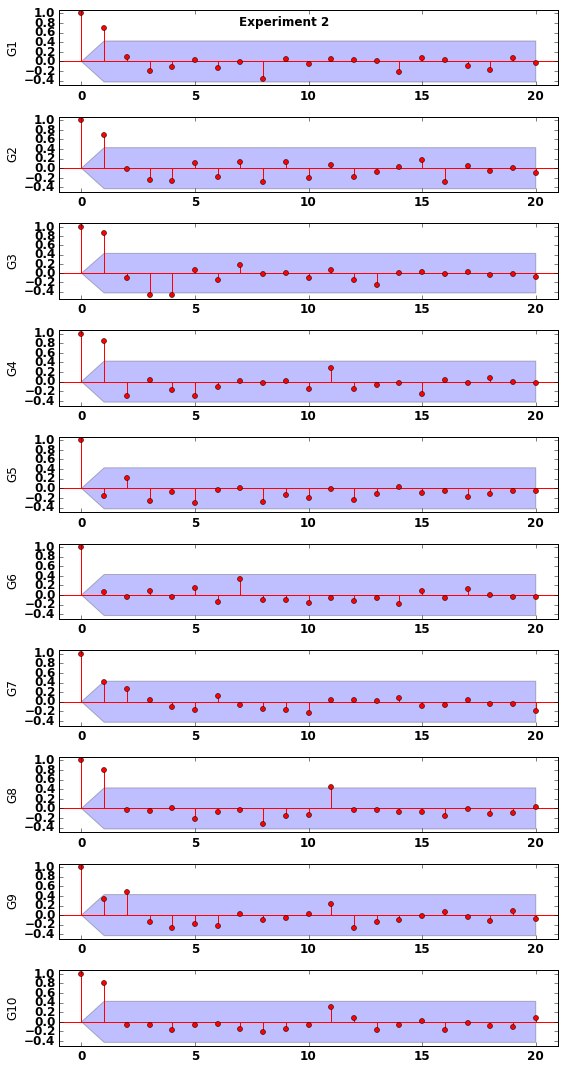

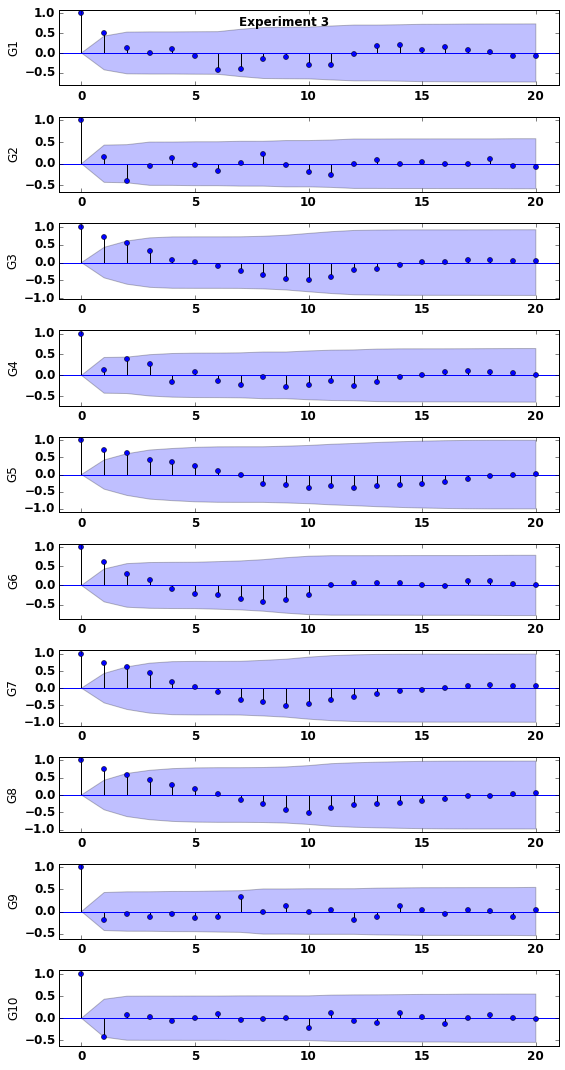

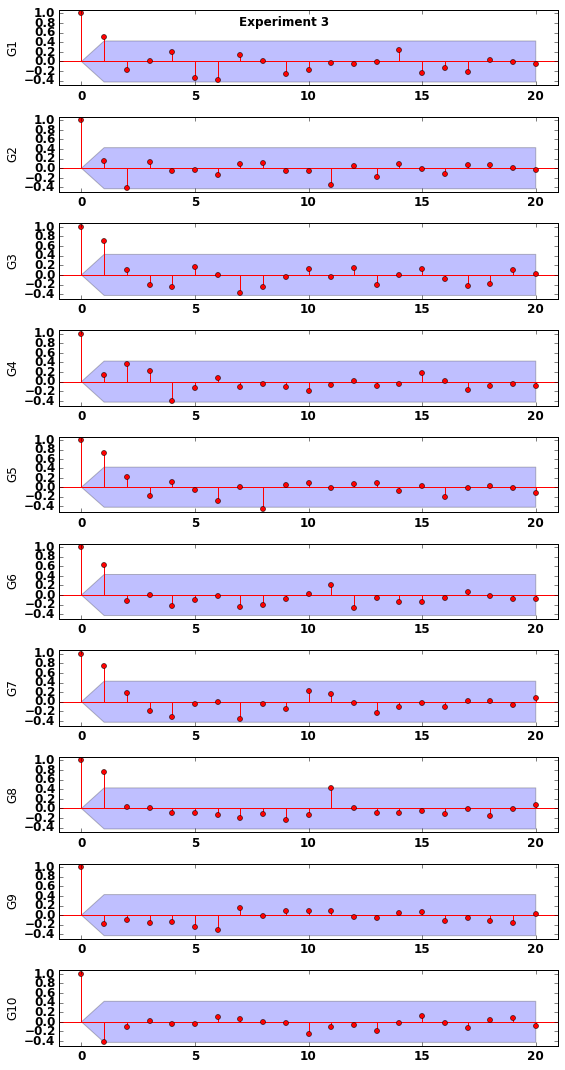

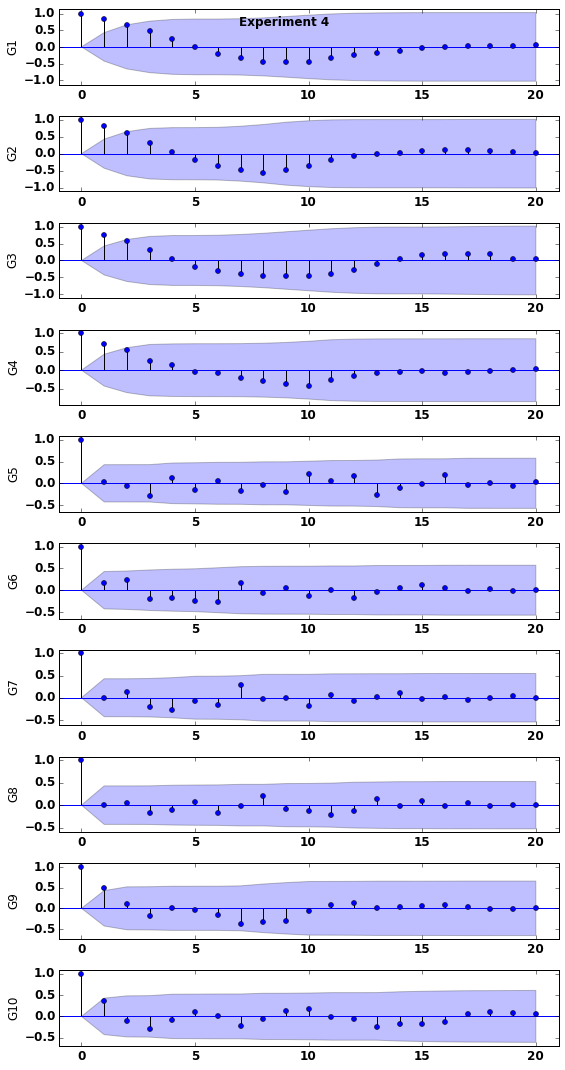

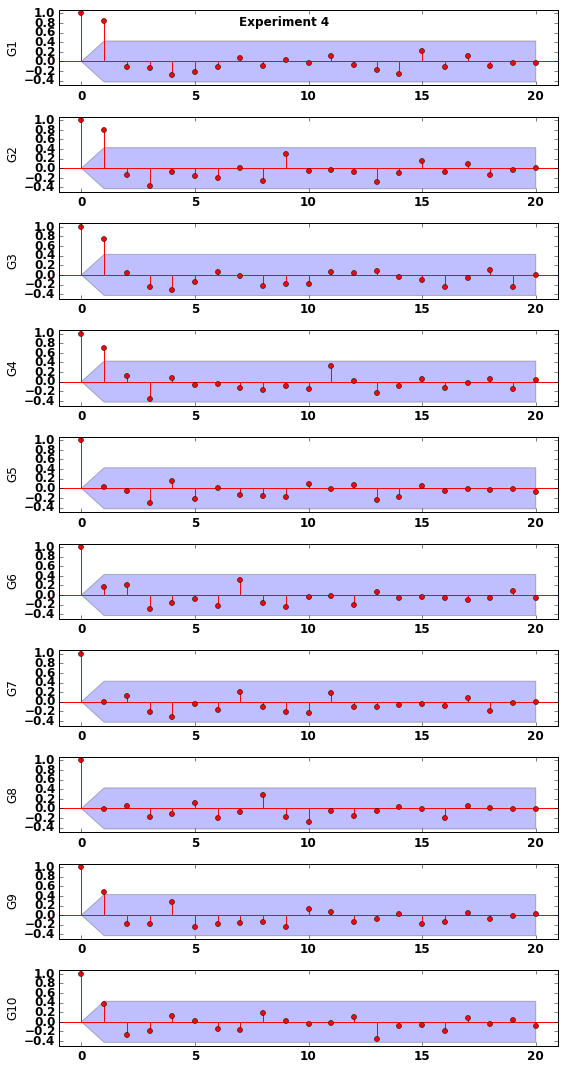

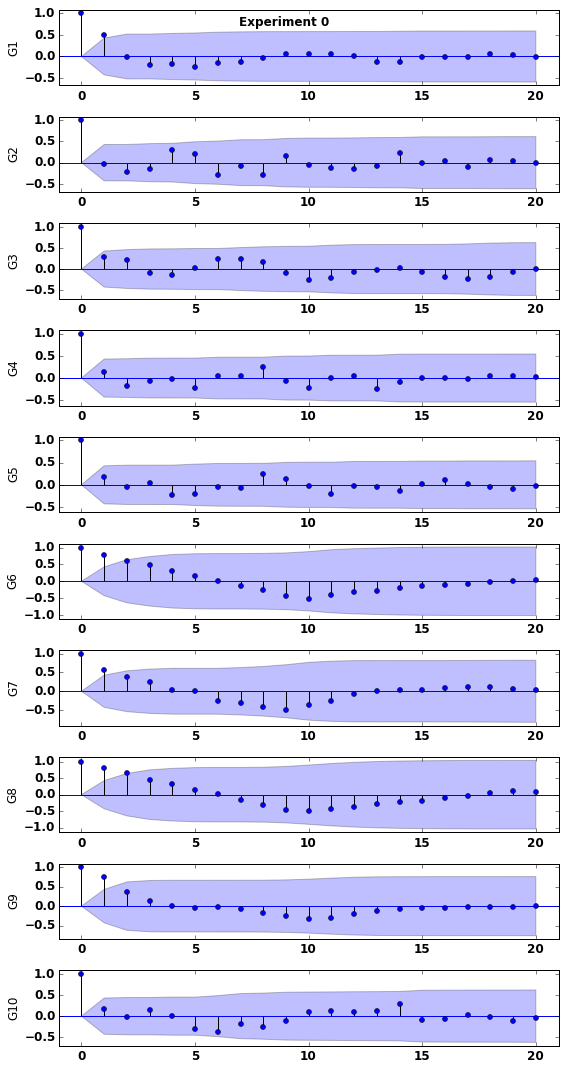

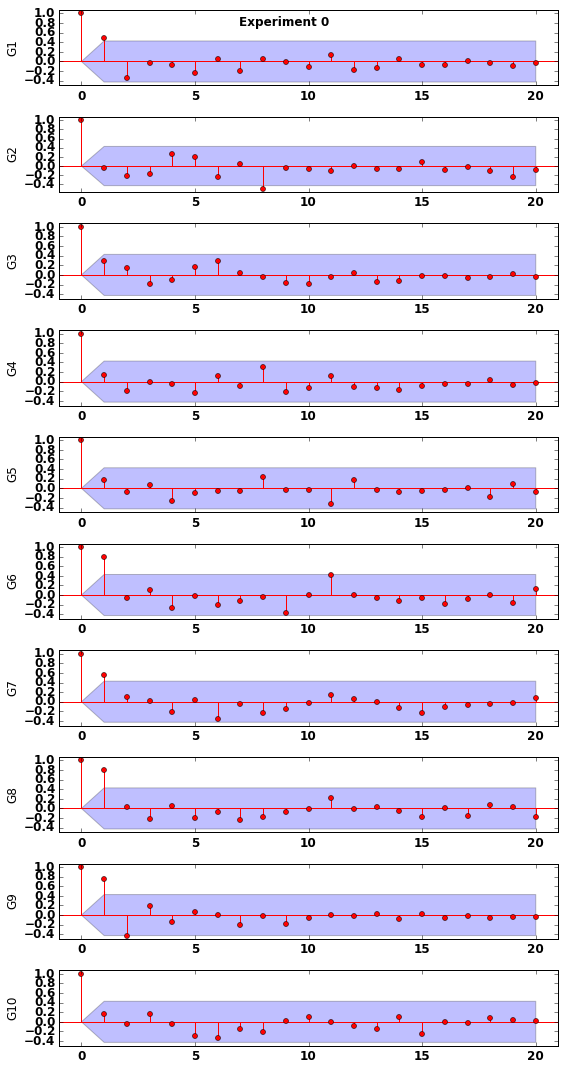

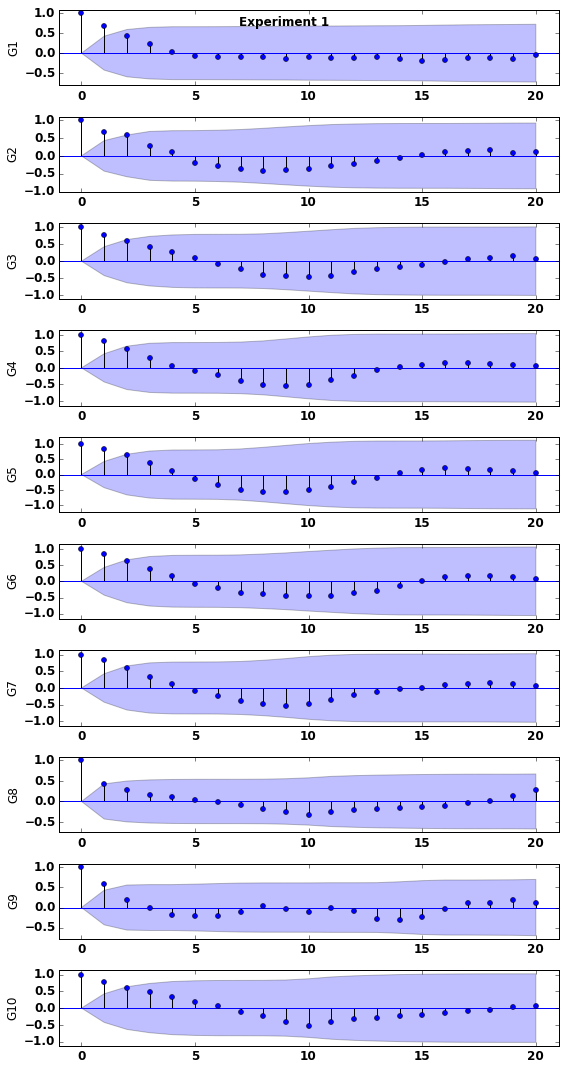

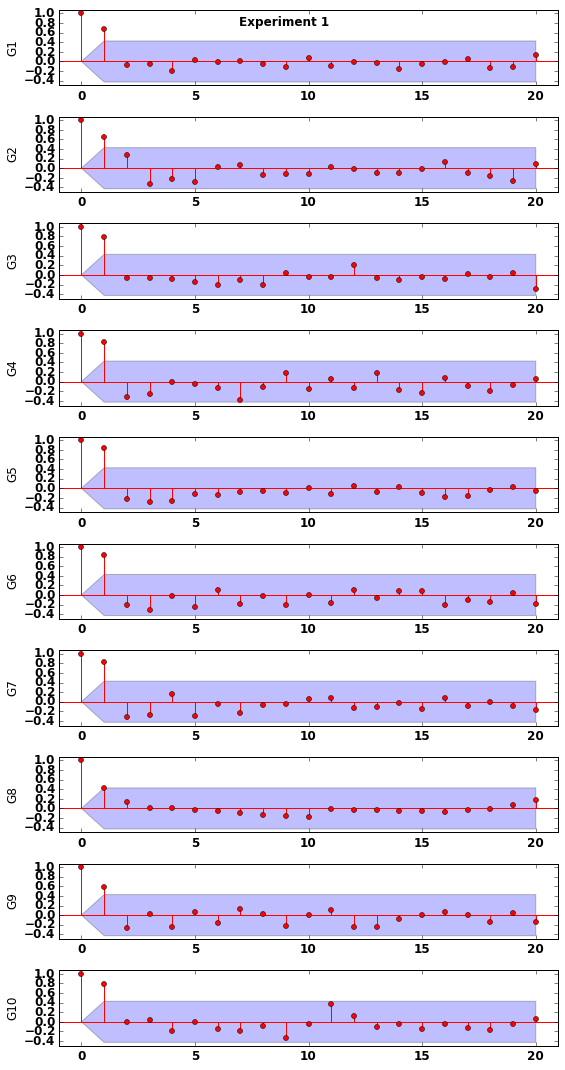

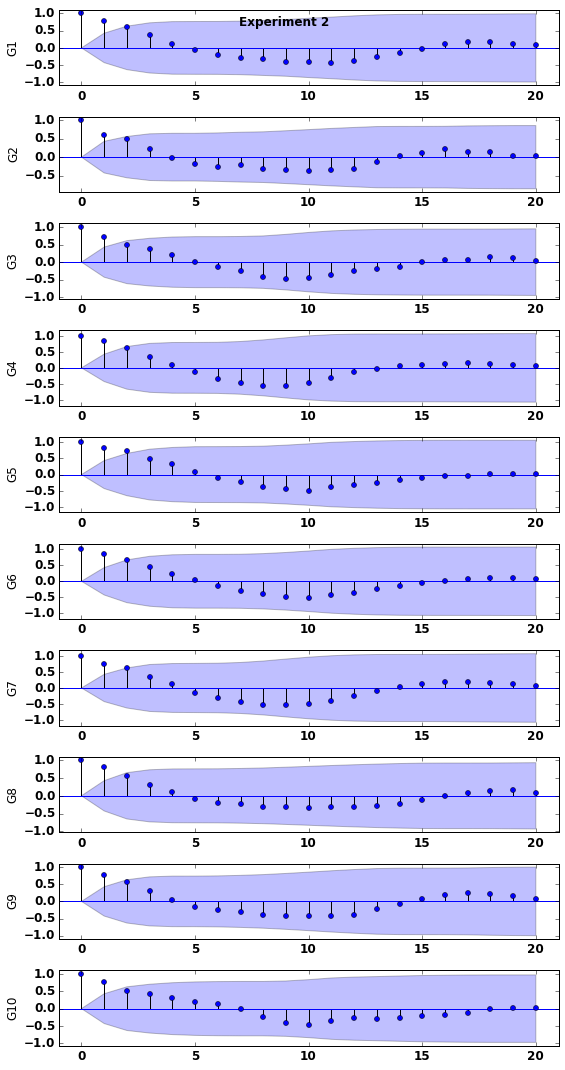

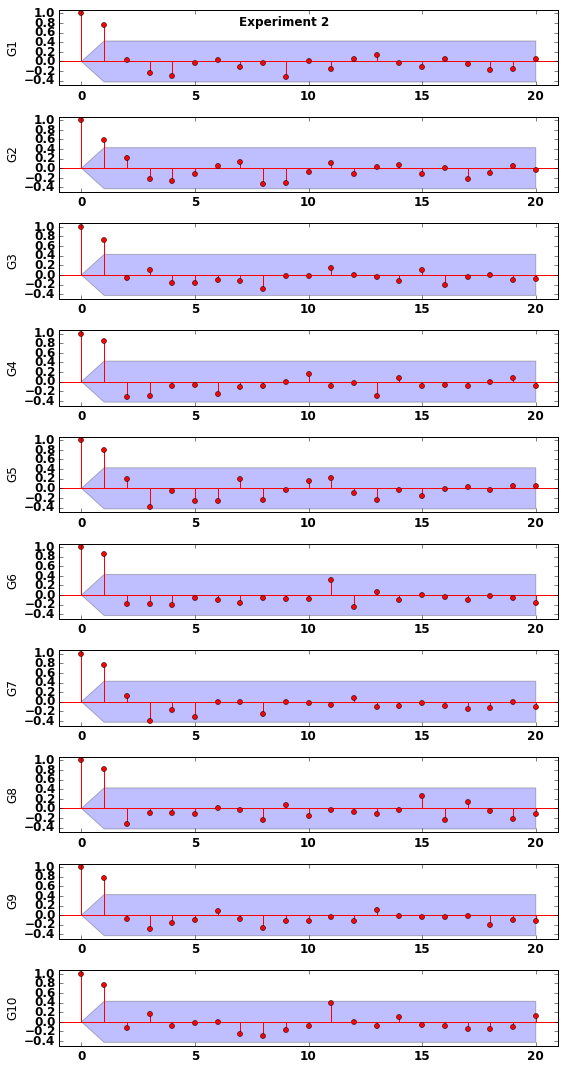

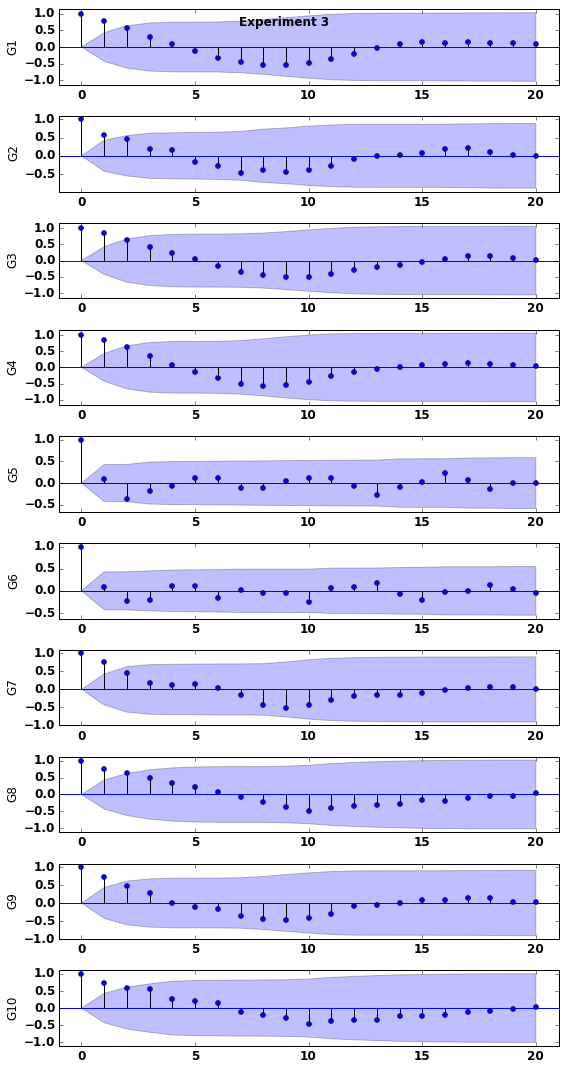

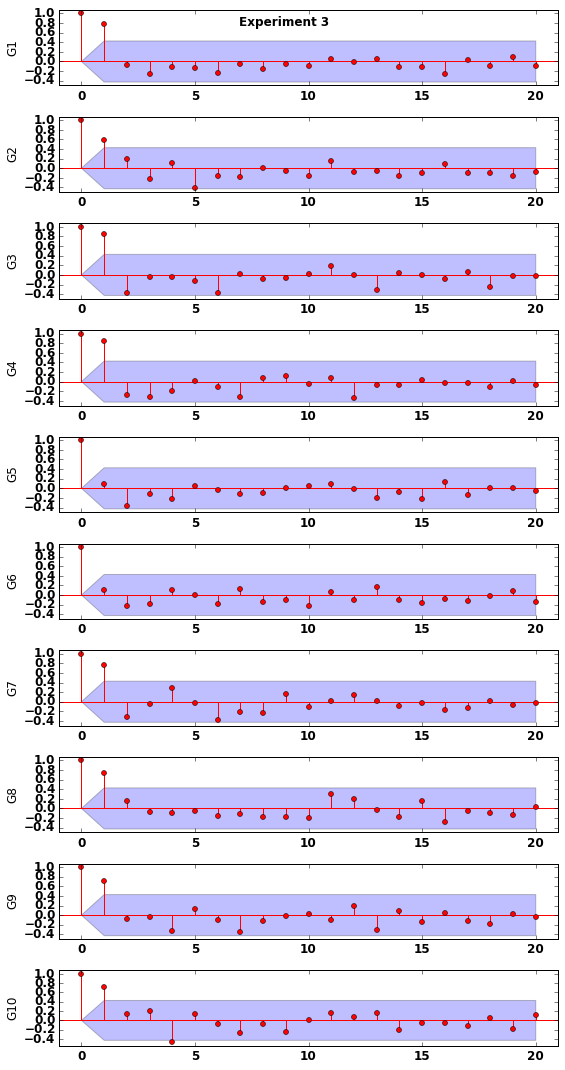

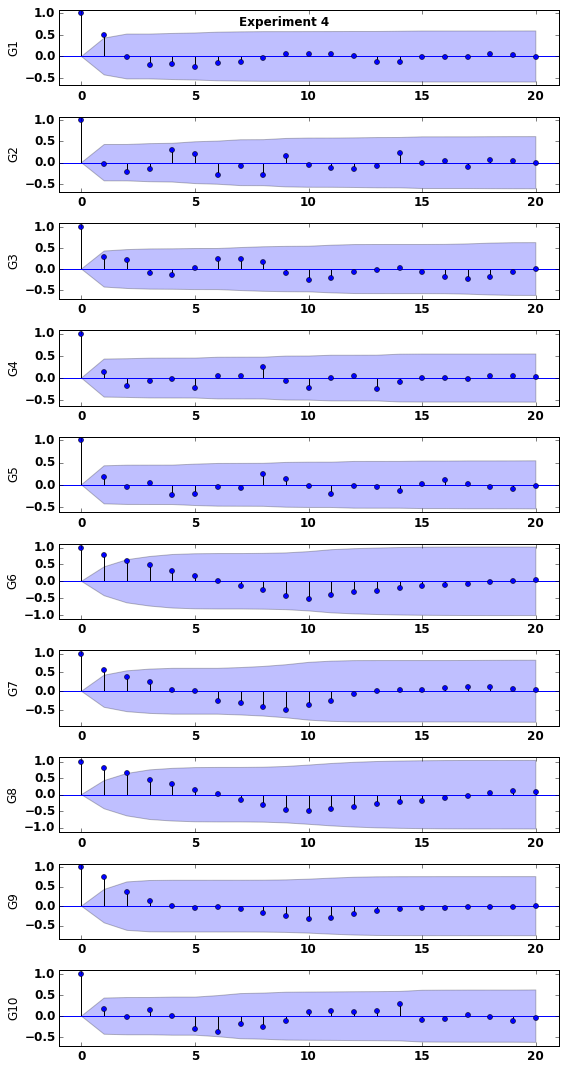

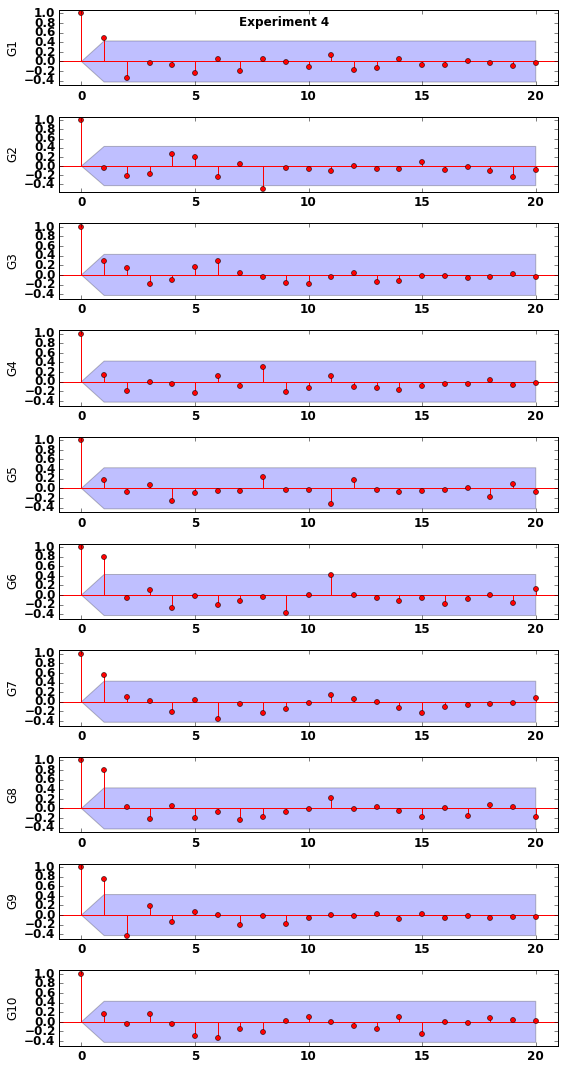

In [136]:
experiments=get_experiment_list("../data/dream4/insilico_size10_2_timeseries.tsv")
for exp in range(0,5):
    fig=plot_acf_exp(exp,experiments,'acf')
    fig2=plot_acf_exp(exp,experiments,'pacf')
    
experiments=get_experiment_list("../data/dream4/insilico_size10_3_timeseries.tsv")
for exp in range(0,5):
    fig=plot_acf_exp(exp,experiments,'acf')
    fig2=plot_acf_exp(exp,experiments,'pacf')
    
experiments=get_experiment_list("../data/dream4/insilico_size10_4_timeseries.tsv")
for exp in range(0,5):
    fig=plot_acf_exp(exp,experiments,'acf')
    fig2=plot_acf_exp(exp,experiments,'pacf')

experiments=get_experiment_list("../data/dream4/insilico_size10_5_timeseries.tsv")
for exp in range(0,5):
    fig=plot_acf_exp(exp,experiments,'acf')
    fig2=plot_acf_exp(exp,experiments,'pacf')

## Investigating Stationarity

In [138]:
experiments=get_experiment_list("../data/dream4/insilico_size10_1_timeseries.tsv")
# test using Augmented Dickey Fuller test
d_order0=stats.adfuller(experiments[0]['G2'],3)
d_order0

print('adf: ', d_order0[0])
print ('p-value: ', d_order0[1])
print('Critical values: ', d_order0[4])

if (d_order0[0]> d_order0[4]['5%']): 
    print('Time Series is  nonstationary')
else:
    print('Time Series is stationary')

adf:  -4.04013407317
p-value:  0.00121434010244
Critical values:  {'1%': -3.8092091249999998, '10%': -2.6507125, '5%': -3.0216450000000004}
Time Series is stationary


adf:  -3.48510990325
p-value:  0.00837783997199
Critical values:  {'5%': -3.0216450000000004, '1%': -3.8092091249999998, '10%': -2.6507125}
Time Series is stationary
